### IMPORTING THE REQUIRED LIBRARIES

In [1]:
import re #import regular expression
import nltk # import natural language tool manipulation
import string
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### CALLING THE DATASET

In [2]:
data_train = pd.read_csv("train_tweet.csv") # importhing the training dataset
data_test = pd.read_csv("test_tweets.csv") # importing testing dataset

### READING THE DATASET

In [3]:
print("train data contents")
print(data_train.head(5),"\n")
print("size of train data",data_train.shape,"\n")# size gives number of rows count shape gives dimension of dataset

print("test data contents")
print(data_test.head(5))
print("size of test data",data_test.shape)

train data contents
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation 

size of train data (31962, 3) 

test data contents
      id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...
size of test data (17197, 2)


### DIFFERENTIATE HATE TWEETS AND NON-HATE TWEETS

Here to classify the hate speech and non hate speech we have considered racist/sexist words present in the given dataset. Based on that label is allocated to it , if label = "0" (non-hate tweet) ,if label= "1"(hate tweet)

In [4]:
print(data_train[data_train['label']==0].head(10)) #non hate tweets

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
5   6      0  [2/2] huge fan fare and big talking before the...
6   7      0   @user camping tomorrow @user @user @user @use...
7   8      0  the next school year is the year for exams.ð...
8   9      0  we won!!! love the land!!! #allin #cavs #champ...
9  10      0   @user @user welcome here !  i'm   it's so #gr...


In [5]:
print(data_train[data_train['label']==1].head(10)) #hate tweet

      id  label                                              tweet
13    14      1  @user #cnn calls #michigan middle school 'buil...
14    15      1  no comment!  in #australia   #opkillingbay #se...
17    18      1                             retweet if you agree! 
23    24      1    @user @user lumpy says i am a . prove it lumpy.
34    35      1  it's unbelievable that in the 21st century we'...
56    57      1            @user lets fight against  #love #peace 
68    69      1  ð©the white establishment can't have blk fol...
77    78      1  @user hey, white people: you can call people '...
82    83      1  how the #altright uses  &amp; insecurity to lu...
111  112      1  @user i'm not interested in a #linguistics tha...


In [6]:
data_train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

### DATA CLEANING

* Removal of unwanted characters
* obtaining better features for modeling

In [7]:
# join both train data and test data

data_combi = data_train.append(data_test, ignore_index = True)
data_combi.shape

(49159, 3)

In [8]:
# defining a pattern removal function

def pattern_remove(input_data , pattern):
    pat = re.findall(pattern, input_data)
    for val in pat:
        input_data = re.sub(val,'',input_data)
    return input_data

In [9]:
## removing tweeter handelers
data_combi['twt_tidy'] = np.vectorize(pattern_remove)(data_combi['tweet'],"@[\w]*")
print(data_combi.head(10))
# the @user is removed from the tweets

   id  label                                              tweet  \
0   1    0.0   @user when a father is dysfunctional and is s...   
1   2    0.0  @user @user thanks for #lyft credit i can't us...   
2   3    0.0                                bihday your majesty   
3   4    0.0  #model   i love u take with u all the time in ...   
4   5    0.0             factsguide: society now    #motivation   
5   6    0.0  [2/2] huge fan fare and big talking before the...   
6   7    0.0   @user camping tomorrow @user @user @user @use...   
7   8    0.0  the next school year is the year for exams.ð...   
8   9    0.0  we won!!! love the land!!! #allin #cavs #champ...   
9  10    0.0   @user @user welcome here !  i'm   it's so #gr...   

                                            twt_tidy  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can't use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the t

In [10]:
# removing punctuation ,numbers , special character

data_combi['twt_tidy'] = data_combi['twt_tidy'].str.replace("[^a-zA-Z#]"," ")
print(data_combi.head(10))

# there hashtags and strings are kept other characters are removed

<ipython-input-10-67791572e53f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data_combi['twt_tidy'] = data_combi['twt_tidy'].str.replace("[^a-zA-Z#]"," ")


   id  label                                              tweet  \
0   1    0.0   @user when a father is dysfunctional and is s...   
1   2    0.0  @user @user thanks for #lyft credit i can't us...   
2   3    0.0                                bihday your majesty   
3   4    0.0  #model   i love u take with u all the time in ...   
4   5    0.0             factsguide: society now    #motivation   
5   6    0.0  [2/2] huge fan fare and big talking before the...   
6   7    0.0   @user camping tomorrow @user @user @user @use...   
7   8    0.0  the next school year is the year for exams.ð...   
8   9    0.0  we won!!! love the land!!! #allin #cavs #champ...   
9  10    0.0   @user @user welcome here !  i'm   it's so #gr...   

                                            twt_tidy  
0    when a father is dysfunctional and is so sel...  
1    thanks for #lyft credit i can t use cause th...  
2                                bihday your majesty  
3  #model   i love u take with u all the t

In [11]:
# removing the short words 

data_combi['twt_tidy'] = data_combi['twt_tidy'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
print(data_combi.head(10))
# all the strings which are less than size 3 are removed

   id  label                                              tweet  \
0   1    0.0   @user when a father is dysfunctional and is s...   
1   2    0.0  @user @user thanks for #lyft credit i can't us...   
2   3    0.0                                bihday your majesty   
3   4    0.0  #model   i love u take with u all the time in ...   
4   5    0.0             factsguide: society now    #motivation   
5   6    0.0  [2/2] huge fan fare and big talking before the...   
6   7    0.0   @user camping tomorrow @user @user @user @use...   
7   8    0.0  the next school year is the year for exams.ð...   
8   9    0.0  we won!!! love the land!!! #allin #cavs #champ...   
9  10    0.0   @user @user welcome here !  i'm   it's so #gr...   

                                            twt_tidy  
0  when father dysfunctional selfish drags kids i...  
1  thanks #lyft credit cause they offer wheelchai...  
2                                bihday your majesty  
3                         #model love take

### TEXT NORMALIZATION

In [12]:
## tokenizing the strings

tweet_tokened = data_combi['twt_tidy'].apply(lambda x : x.split())
print(tweet_tokened.head(5))
type(tweet_tokened)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: twt_tidy, dtype: object


pandas.core.series.Series

### NLTK PORTSTEMMER 
* used to recude the words to its root

In [13]:
from nltk.stem.porter import *

In [14]:
stemmer = PorterStemmer()
tweet_tokened = tweet_tokened.apply(lambda x: [stemmer.stem(i) for i in x])
print(tweet_tokened.head(5))

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: twt_tidy, dtype: object


### VISUALIZATION

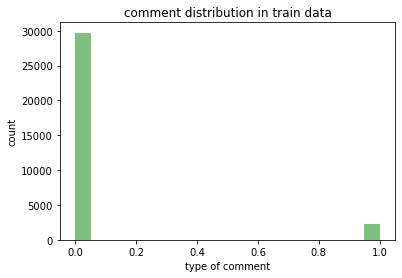

In [15]:
# finding the distribution of hate comments and non hate comments

plt.hist(data_train['label'],
        bins = 20,
        alpha = 0.5,
        color = 'green',
        label = 'range of hate comment and non hate comment')
plt.title("comment distribution in train data")
plt.xlabel("type of comment")
plt.ylabel("count")
plt.show()

In [16]:
# impact of hashtags in the tweets
# function defined for extravting hashtags
def extract_ht(x):
    ht_data= []
    for i in x:
        ht = re.findall(r'#[\w]+',i)
        ht_data.append(ht)
    return ht_data

In [17]:
# extracting hash tags from non-racist tweets
positive_ht = extract_ht(data_combi['twt_tidy'][data_combi['label']==0]) # calling extract_ht function
print(positive_ht[:4])

[['#run'], ['#lyft', '#disapointed', '#getthanked'], [], ['#model']]


In [18]:
# extracting hashtags from racist comment
negative_ht = extract_ht(data_combi['twt_tidy'][data_combi['label']==1]) # calling extract_ht function
print(negative_ht[:4])

[['#cnn', '#michigan', '#tcot'], ['#australia', '#opkillingbay', '#seashepherd', '#helpcovedolphins', '#thecove', '#helpcovedolphins'], [], []]


In [19]:
## unnesting the list
positive_ht = sum(positive_ht,[])
negative_ht = sum(negative_ht,[])

In [20]:
print(negative_ht[:4]) # converted to single list

['#cnn', '#michigan', '#tcot', '#australia']


In [21]:
# creating dataset frequency of hash tags for positive comments
freq = nltk.FreqDist(positive_ht)

df = pd.DataFrame({'hashtags':list(freq.keys()),
                  'count':list(freq.values())})
print(df.head(5))

       hashtags  count
0          #run     34
1         #lyft      2
2  #disapointed      1
3   #getthanked      2
4        #model    365


In [22]:
# creating dataset frequency of hash tags for negative comments
n_freq = nltk.FreqDist(negative_ht)
df_n = pd.DataFrame({'hashtags':list(n_freq.keys()),
                    'count':list(n_freq.values())})
print(df_n.head(5))

        hashtags  count
0           #cnn     10
1      #michigan      2
2          #tcot     14
3     #australia      6
4  #opkillingbay      5


<AxesSubplot:>

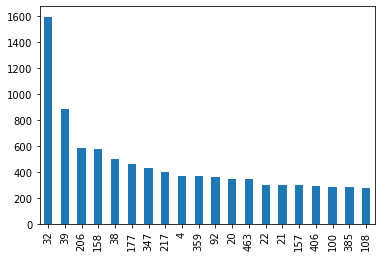

In [23]:
## plotting the hashtags
df = df.nlargest(columns = "count",n = 20)
df['count'].plot(kind = 'bar')

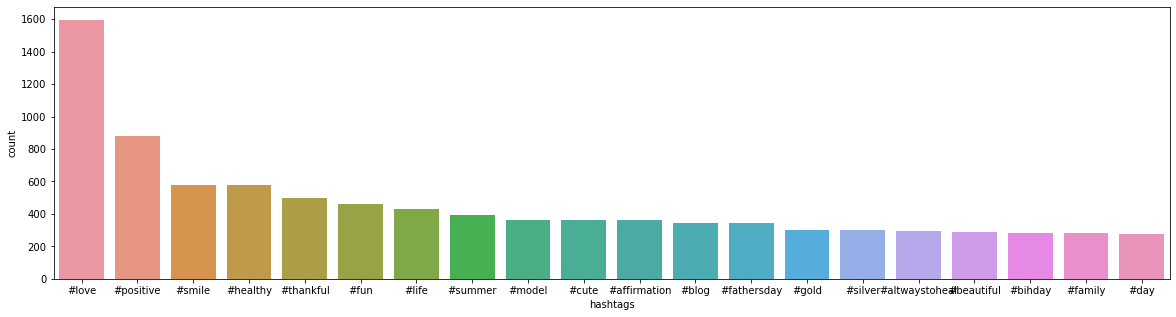

In [24]:
#using seaborn
plt.figure(figsize = (20,5))
sn_plt = sns.barplot(data = df, x = 'hashtags', y = 'count')
sn_plt.set(ylabel = 'count')
plt.show()

##### from the plot we can conclude that words like love ,positive , smile are frequently used in positive comments

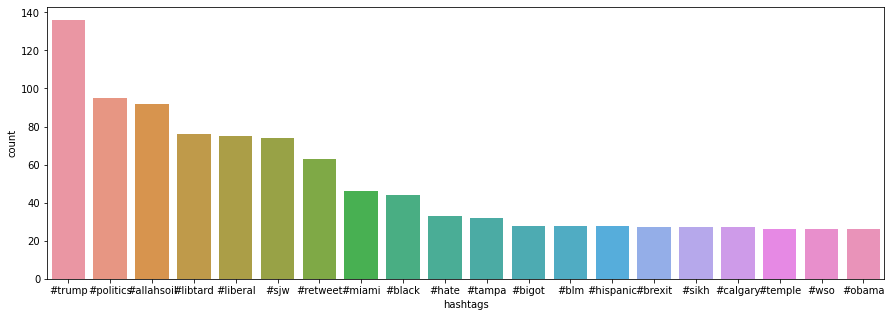

In [25]:
df_n = df_n.nlargest(columns = "count",n = 20)
plt.figure(figsize = (15,5))
sn_plt = sns.barplot(data = df_n, x = 'hashtags', y = 'count')
sn_plt.set(ylabel = 'count')
plt.show()

##### from this plot we can conclude that trump , politics , allahsoi are some of the most frequent occured in hate tweets 

#### FEATURE EXTRACTION

In [26]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [27]:
# importing the libraries
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from gensim.models import Word2Vec

In [28]:
## applying word2vector feature extraction
tweet_tokened = data_combi['twt_tidy'].apply(lambda x : x.split())

In [29]:
# building the model for word2vector
mod_w2v = Word2Vec( tweet_tokened,
                                   vector_size = 200,
                                     window =5,
                                     min_count = 2,
                                     sg = 1,
                                     hs = 0,
                                     negative = 10,
                                     workers = 2,
                                     seed = 34)

In [30]:
# training the model
mod_w2v.train(tweet_tokened, total_examples = len(data_combi['twt_tidy']),epochs = 20)

(6480119, 7536020)

In [31]:
mod_w2v.wv.most_similar(positive='love') # checking the word2vector for love
#mod_w2v.wv['food']


[('#indonesiafoheworld', 0.4649658501148224),
 ('weeksary', 0.44968342781066895),
 ('cassidy', 0.442415326833725),
 ('#formation', 0.43606218695640564),
 ('#bihdaybash', 0.4297032356262207),
 ('#heroesdayug', 0.42831435799598694),
 ('brad', 0.4174644649028778),
 ('#beloved', 0.41512009501457214),
 ('#bikinibody', 0.41222089529037476),
 ('maddy', 0.41017547249794006)]

In [32]:
## creating the dataframe 
def word_vec(token, size):
    vect= np.zeros(size).reshape((1,size))
    count = 0
    for word in token:
        try:
            
            vect += mod_w2v.wv[word].reshape((1,size))
            count += 1
        except KeyError:
            continue
    if count != 0:
        vect /= count
    return vect

In [33]:
print(len(tweet_tokened))

49159


In [34]:
## creating the dataframe
array_w2v = np.zeros((len(tweet_tokened),200))
for i in range(len(tweet_tokened)):
    array_w2v[i:] = word_vec(tweet_tokened[i],200)
    df_word2vec = pd.DataFrame(array_w2v)

In [35]:
print(df_word2vec.head(5))
print(df_word2vec.dtypes)

        0         1         2         3         4         5         6    \
0  0.077610 -0.010712  0.126981 -0.013437 -0.172074  0.073211 -0.299917   
1  0.007966 -0.369694  0.361128 -0.146941  0.107485  0.090121 -0.301480   
2 -0.128753 -0.209144  0.045659  0.089445 -0.266204  0.004872 -0.249671   
3 -0.061228 -0.421191 -0.183243  0.460053 -0.105567  0.355856 -0.002528   
4 -0.164050  0.162376  0.048394 -0.114294  0.010260  0.232262 -0.306243   

        7         8         9    ...       190       191       192       193  \
0 -0.335531  0.261413 -0.127338  ...  0.187304 -0.054835  0.137010 -0.131696   
1 -0.224632  0.346703  0.153541  ...  0.108122 -0.381661  0.351959 -0.365586   
2 -0.258327  0.105127  0.106135  ... -0.123542 -0.214031  0.251248 -0.274669   
3 -0.205643  0.432995  0.068895  ...  0.373826 -0.236816  0.113702 -0.237839   
4 -0.365593  0.383851  0.217481  ...  0.189433 -0.442950  0.441518  0.007044   

        194       195       196       197       198       199  
0  0

In [36]:
train_dat = df_word2vec.iloc[:31962,:]
data_test1 = df_word2vec.iloc[31962:,:]

#### BUILD A MACHINE LEARNING MODEL TO PREDICT THE OUTPUT

* import the required libraries
* using random forest machine learning model for prediction

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score , confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [38]:
rf = RandomForestClassifier(n_estimators=400 , random_state=11)

In [39]:
xtrain , xtest , ytrain , yval = train_test_split(train_dat ,data_train['label'] ,test_size = 0.3 )

In [40]:
rf.fit(xtrain , ytrain)

RandomForestClassifier(n_estimators=400, random_state=11)

In [41]:
pred_xval = rf.predict(xtest)

In [42]:
accuracy_score(pred_xval, yval)

0.9542183752216081

In [43]:
pred_of_test = rf.predict(data_test1)

In [44]:
pred_of_test.size

17197

In [45]:
final = pd.DataFrame()
final['id'] = data_test['id']

In [46]:
final['label'] = pred_of_test

In [47]:
final.head(5)

,id,label
0,31963,0
1,31964,0
2,31965,0
3,31966,0
4,31967,0


In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
cf_matrix = confusion_matrix(yval, pred_xval)
print(cf_matrix)

[[8903   17]
 [ 422  247]]


In [50]:
print("f1 score :", f1_score(yval, pred_xval))

f1 score : 0.5294748124330118


<AxesSubplot:>

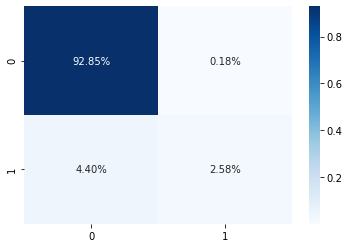

In [51]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')